# 680 Project 1: Twitter Sentiment
Name: Joi Chu-Ketterer <br>  Date: 4/11/2020 <br>Course: DSC680 - Applied Data Science

This notebook is split into analysis sections. 

In [1]:
import pandas as pd
import time
import datetime 

from textblob import TextBlob
import re

# Data Preparation

This section cleans and prepares the raw data for analysis.

In [2]:
df_1 = pd.read_csv('twitter.csv')
df_2 = pd.read_csv('twitter2.csv')
df_3 = pd.read_csv('twitter3.csv')
df_4 = pd.read_csv('twitter4.csv')
;

/Users/jckett/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jckett/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,

''

In [3]:
df_new = df_1.append(df_2, ignore_index=True)
df_new = df_new.append(df_3, ignore_index=True)
df = df_new.append(df_4, ignore_index=True)
df.shape

(21407, 623)

In [4]:
df.head()

,Date,ID,ID_str,Text,Source,truncated,reply to,reply to.1,reply to.2,reply to.3,...,Unnamed: 613,Unnamed: 614,Unnamed: 615,Unnamed: 616,Unnamed: 617,Unnamed: 618,Unnamed: 619,Unnamed: 620,Unnamed: 621,Unnamed: 622
0,"{""created_at"":""Wed Mar 18 21:49:47 +0000 2020""",id:1240394999046561793,"id_str:""1240394999046561793""","text:""RT @tinymallet: Got my fresh air today S...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"/n{""created_at"":""Wed Mar 18 21:49:50 +0000 2020""",id:1240395012174688257,"id_str:""1240395012174688257""","text:""RT @tinymallet: Got my fresh air today S...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"/n{""created_at"":""Wed Mar 18 21:49:56 +0000 2020""",id:1240395036199706630,"id_str:""1240395036199706630""","text:""RT @francisdominiic: No one: \n\nMe on D...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"/n{""created_at"":""Wed Mar 18 21:50:01 +0000 2020""",id:1240395056311394304,"id_str:""1240395056311394304""","text:""RT @tinymallet: Got my fresh air today S...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"/n{""created_at"":""Wed Mar 18 21:50:05 +0000 2020""",id:1240395073692545024,"id_str:""1240395073692545024""","text:""RT @tinymallet: Got my fresh air today S...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def clean(dataframe):
    dataframe.drop(dataframe.iloc[:, 16:623], inplace = True, axis = 1)
    dataframe.drop(dataframe.columns[[1,2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]], axis = 1, inplace = True)
    
    # removing create on
    dataframe['Date'] = dataframe['Date'].map(lambda x: x.lstrip('/n{"created_at":"').replace(' +0000 2020"',""))

    # parsing datetime data
    dataframe['Date'] = dataframe['Date'].map(lambda x: datetime.datetime.strptime(x, '%a %b %d %H:%M:%S').strftime("%m/%d/20 %H:%M:%S"))                    

    #changes date into a datetime format once cleaned
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    
    # cleaning Text column 
    dataframe['Text'] = dataframe['Text'].map(lambda x: x.lstrip('text:"').rstrip('"')) 

    # cleaning handle column
    dataframe['handle'] = dataframe['handle'].map(lambda x: x.lstrip('screen_name:"').rstrip('"')) 

    # cleaning location column
    dataframe['location'] = dataframe['location'].map(lambda x: x.lstrip('location:"').rstrip('"'))        


def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
def prep(dataframe):
    
    clean(dataframe)
    
    dataframe['Sentiment'] = dataframe['Text'].map(lambda x: get_tweet_sentiment(x)) 

# Sentiment Analysis

This section focuses on tagging the tweets to identifying them as positive, neutral, or negative tweets. 

In [6]:
prep(df)
df.head()

,Date,Text,handle,location,Sentiment
0,2020-03-18 21:49:47,RT @tinymallet: Got my fresh air today Soarin\...,3rz,ESSJ,positive
1,2020-03-18 21:49:50,RT @tinymallet: Got my fresh air today Soarin\...,oacfjoe,he\/him,positive
2,2020-03-18 21:49:56,RT @francisdominiic: No one: \n\nMe on Day 5 o...,hope0517,ull,neutral
3,2020-03-18 21:50:01,RT @tinymallet: Got my fresh air today Soarin\...,ffyJEAH,Portland,positive
4,2020-03-18 21:50:05,RT @tinymallet: Got my fresh air today Soarin\...,venofninee,Disneyland | 22 | she\/her,positive


In [7]:
copy = df.copy()
copy.set_index('Date', inplace=True)
copy.head()

,Text,handle,location,Sentiment
Date,,,,
2020-03-18 21:49:47,RT @tinymallet: Got my fresh air today Soarin\...,3rz,ESSJ,positive
2020-03-18 21:49:50,RT @tinymallet: Got my fresh air today Soarin\...,oacfjoe,he\/him,positive
2020-03-18 21:49:56,RT @francisdominiic: No one: \n\nMe on Day 5 o...,hope0517,ull,neutral
2020-03-18 21:50:01,RT @tinymallet: Got my fresh air today Soarin\...,ffyJEAH,Portland,positive
2020-03-18 21:50:05,RT @tinymallet: Got my fresh air today Soarin\...,venofninee,Disneyland | 22 | she\/her,positive


In [8]:
grouped = copy.groupby([pd.Grouper(freq='1H'), 'Sentiment'])
grouped.head()

,Text,handle,location,Sentiment
Date,,,,
2020-03-18 21:49:47,RT @tinymallet: Got my fresh air today Soarin\...,3rz,ESSJ,positive
2020-03-18 21:49:50,RT @tinymallet: Got my fresh air today Soarin\...,oacfjoe,he\/him,positive
2020-03-18 21:49:56,RT @francisdominiic: No one: \n\nMe on Day 5 o...,hope0517,ull,neutral
2020-03-18 21:50:01,RT @tinymallet: Got my fresh air today Soarin\...,ffyJEAH,Portland,positive
2020-03-18 21:50:05,RT @tinymallet: Got my fresh air today Soarin\...,venofninee,Disneyland | 22 | she\/her,positive
...,...,...,...,...
2020-03-30 04:02:12,RT @JMarin1114: #Disney #Disneyland #disneyvil...,teenwolfgray72,Lebanon,negative
2020-03-30 04:02:25,RT @JMarin1114: #Disney #Disneyland #disneyvil...,Spider_Gina,ull,negative
2020-03-30 04:02:28,All aboard! A new Monday Morning Monorail #pod...,MorningMonorail,Orlando,positive


In [9]:
sentiment_count = grouped['Text'].count()
sentiment_count = pd.DataFrame(sentiment_count)
sentiment_count.shape

(378, 1)

In [10]:
sentiment_count.head()

Text
Date                Sentiment      
2020-03-18 21:00:00 negative      6
                    neutral      38
                    positive     72
2020-03-18 22:00:00 negative     25
                    neutral     248

In [11]:
sentiment_count.to_csv ("data.csv", index = True, header=True)

# Hashtag Count

This section analyzes the cleaned data to determine the highest count hashtag. This provides insight to which parks and topics are engaging the public. 

In [12]:
hashtags = []

for y in copy['Text']:
        tag = set([re.sub(r"(\W+)$", "", j) for j in set([i for i in y.split() if i.startswith("#")])])   
        hashtags.append(tag)


In [13]:
# essentially gets rid of nulls, or empty sets

clean_set = list(filter(lambda a: a != set(), hashtags))

In [14]:
# turns the sets into lists

clean_list = []

for i in clean_set:
    s = list(i)
    clean_list.append(s)

In [15]:
# expands all the sublists into one big list

flatten_list = sum(clean_list, [])
final_list = [x.lower() for x in flatten_list]

from collections import Counter

a = dict(Counter(final_list))

<function matplotlib.pyplot.show(*args, **kw)>

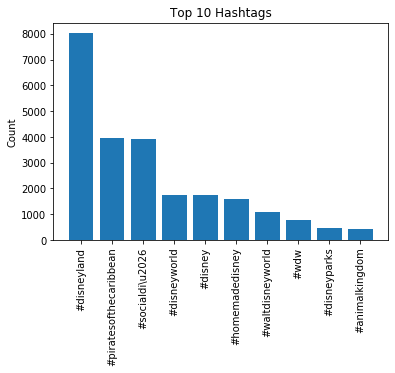

In [17]:
import matplotlib.pylab as plt
from operator import itemgetter

# sorted by key, return a list of tuples
lists = sorted(a.items(), key = itemgetter(1), reverse = True)[:10]

# unpack a list of pairs into two tuples
x,y = zip(*lists)

plt.bar(x, y)
plt.title("Top 10 Hashtags")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show
#plt.savefig('hashtag.png')

In [28]:
disneyland = copy[copy["Text"].str.contains('#disneyland')]
disneyland_sentiment = disneyland.groupby('Sentiment').count()
disneyland_sentiment

,Date,Text,handle,location
Sentiment,,,,
negative,61,61,61,61
neutral,1139,1139,1139,1139
positive,1439,1439,1439,1439


In [29]:
pirates = copy[copy["Text"].str.contains('#piratesofthecaribbean')]
pirates_sentiment = pirates.groupby('Sentiment').count()
pirates_sentiment

,Date,Text,handle,location
Sentiment,,,,
neutral,4,4,4,4
positive,2,2,2,2


In [31]:
world = copy[copy["Text"].str.contains('#disneyworld')]
world_sentiment = world.groupby('Sentiment').count()
world_sentiment

,Date,Text,handle,location
Sentiment,,,,
negative,54,54,54,54
neutral,408,408,408,408
positive,285,285,285,285
